<a href="https://colab.research.google.com/github/jpseixasesilva/Machine-Learning-Projects/blob/master/4Intelligence_Case01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**


Case 1

Open the TFP.csv file attached.

The series is composed by TFP (rtfpna variable) at constant national prices (2005 = 1) for three countries: United States (USA), Canada (CAN) and Mexico (MEX).

Make an exploratory data analysis;

Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”);

Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain.



In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/4Intelligence ChallengeJob

/content/drive/My Drive/Colab Notebooks/4Intelligence ChallengeJob


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 

# Data Preparation

## Set 'year' as index

In [ ]:
tfp = pd.read_csv('TFP.csv')
tfp.index = pd.to_datetime(tfp['year'], format= "%Y")
tfp.drop('year', inplace=True, axis=1)

## Head, Describe

In [ ]:
tfp.head(50)

In [ ]:
tfp.describe()

## Groupby country

In [ ]:
tfpusa=tfp[tfp['isocode']=='USA']; tfpusa.drop('isocode',inplace=True, axis=1)
tfpcan=tfp[tfp['isocode']=='CAN']; tfpcan.drop('isocode',inplace=True, axis=1)
tfpmex=tfp[tfp['isocode']=='MEX']; tfpmex.drop('isocode',inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
type(tfpusa.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Plot graph

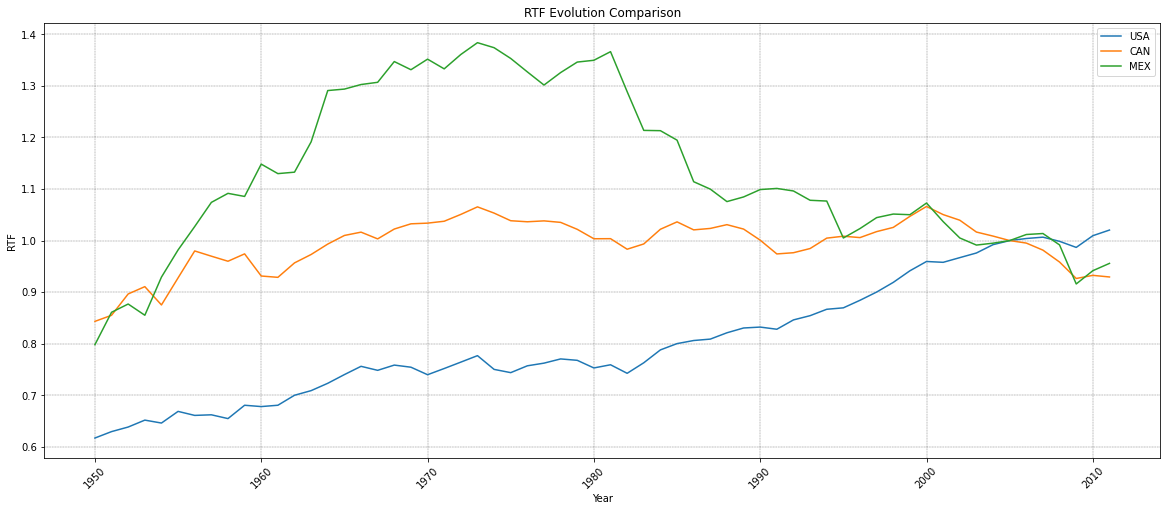

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(tfpusa.index,'rtfpna',data=tfpusa)
plt.plot(tfpcan.index,'rtfpna',data=tfpcan)
plt.plot(tfpmex.index,'rtfpna',data=tfpmex)

plt.legend(["USA", "CAN", "MEX"])
plt.title('RTF Evolution Comparison')
plt.xlabel('Year')
plt.ylabel('RTF')
plt.xticks(rotation=45)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.25)
plt.show()

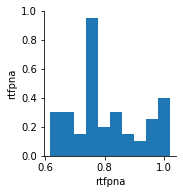

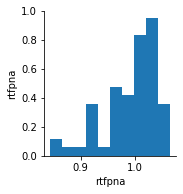

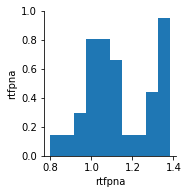

In [ ]:
sns.pairplot(tfpusa);
sns.pairplot(tfpcan);
sns.pairplot(tfpmex);

In [ ]:
result = seasonal_decompose(np.array(tfpusa.drop('isocode', inplace=True, axis=1)))
result.plot();

KeyError: ignored

In [ ]:
type(np.array(tfpusa))

numpy.ndarray

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


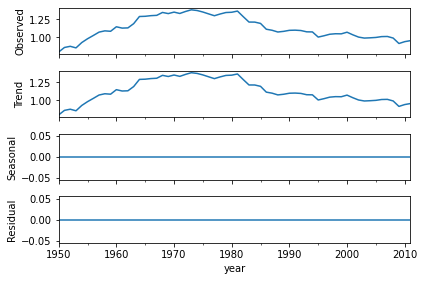

In [ ]:
tfpmex = tfp[tfp['isocode']=='MEX']
tfpmex.drop('isocode', inplace=True, axis=1)

tfpmex

result = seasonal_decompose(tfpmex);
result.plot();

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


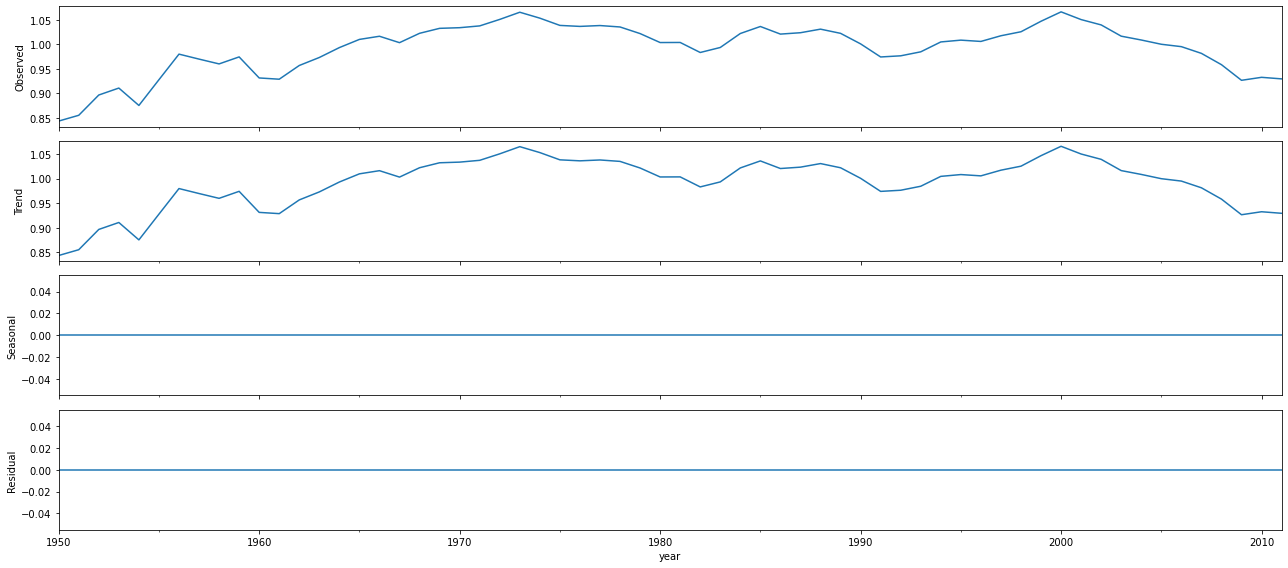

In [ ]:
tfpcan = tfp[tfp['isocode']=='CAN']
tfpcan.drop('isocode', inplace=True, axis=1)

tfcan

result = seasonal_decompose(tfpcan)
result.plot();

# Transform to stationary

In [ ]:
tfpusa.diff(periods=1)
tfpcan.diff(periods=1)
tfpmex.diff(periods=1)

,rtfpna
year,
1950-01-01,NaN
1951-01-01,0.062772
1952-01-01,0.016036
1953-01-01,-0.021763
1954-01-01,0.073963
...,...
2007-01-01,0.001923
2008-01-01,-0.022125
2009-01-01,-0.075669


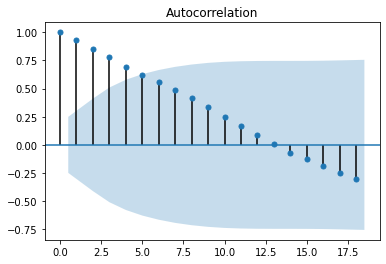

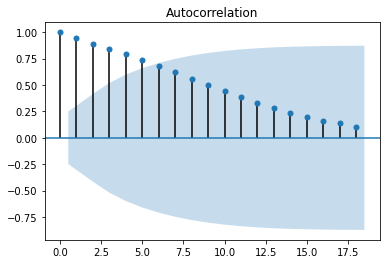

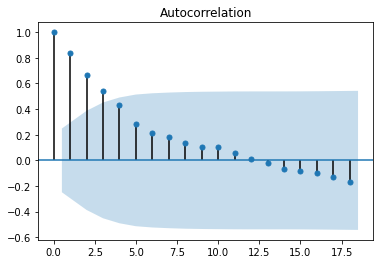

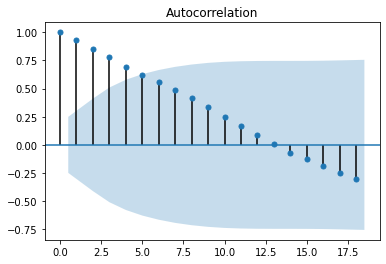

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tfpusa)
plot_acf(tfpcan)
plot_acf(tfpmex)

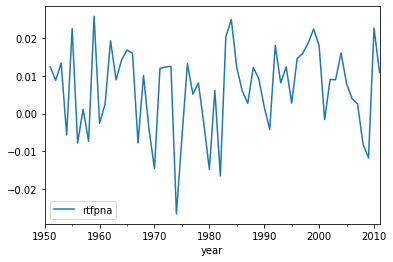

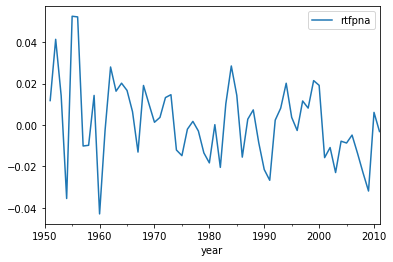

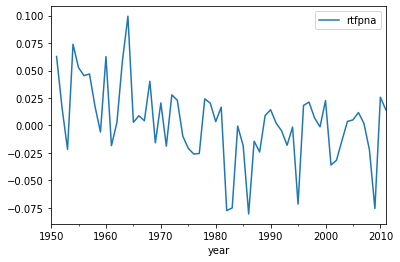

In [ ]:
tfpusa.diff(1).plot()
tfpcan.diff(1).plot()
tfpmex.diff(1).plot()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [ ]:
X = tfpusa.values
X.shape

(62, 1)

In [ ]:
X = tfpusa.values
train = X[0:42]
test = X[42:]

In [ ]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=42, end=62)

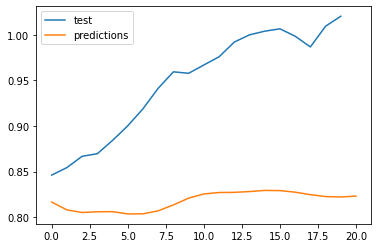

In [ ]:
plt.plot(test)
plt.plot(predictions)
plt.legend(['test','predictions']);

# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_arima = ARIMA(train, order=(5,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.)

-232.44612871216714


In [ ]:
predictions = model_arima_fit.forecast(steps=60)[0]
predictions

array([0.83369206, 0.83988891, 0.84628409, 0.85093075, 0.85571761,
       0.86090269, 0.86605789, 0.87135119, 0.87636856, 0.88157823,
       0.88664865, 0.89185243, 0.89695567, 0.90212478, 0.90724626,
       0.91240044, 0.91753551, 0.92268122, 0.92782149, 0.93296346,
       0.93810591, 0.94324689, 0.94838976, 0.95353069, 0.95867336,
       0.96381458, 0.96895695, 0.97409845, 0.97924057, 0.98438227,
       0.98952425, 0.99466605, 0.99980795, 1.00494981, 1.01009168,
       1.01523355, 1.02037541, 1.02551729, 1.03065915, 1.03580103,
       1.04094289, 1.04608476, 1.05122663, 1.0563685 , 1.06151037,
       1.06665224, 1.07179411, 1.07693598, 1.08207784, 1.08721971,
       1.09236158, 1.09750345, 1.10264532, 1.10778719, 1.11292906,
       1.11807093, 1.12321279, 1.12835466, 1.13349653, 1.1386384 ])

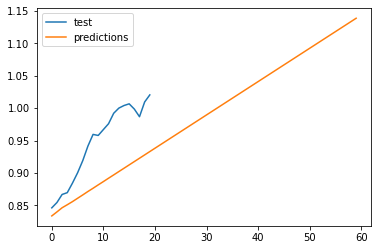

In [ ]:
plt.plot(test)
plt.plot(predictions)
plt.legend(['test','predictions']);